# 6.2: Exploring Relationships

# 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
#Import cleaned data frame
df_realtor = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_data_cleaned')

In [6]:
#Check head to make sure it worked
df_realtor.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price_range
3403,for_sale,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,NaN,Low Range
3404,for_sale,25000.0,NaN,NaN,3.41,Agawam,Massachusetts,1001.0,NaN,NaN,Low Range
3405,for_sale,169900.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,892.0,2019-04-30,Low Range
3406,for_sale,242000.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1428.0,NaN,Low Range
3407,for_sale,299950.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1659.0,NaN,Low Range


# 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [8]:
#Drop 'zip_code' column.  I will not need this for analysis.
df_realtor = df_realtor.drop(columns=['zip_code'])

In [9]:
#Check to ensure it worked
df_realtor.head()

,status,price,bed,bath,acre_lot,city,state,house_size,prev_sold_date,price_range
3403,for_sale,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,676.0,NaN,Low Range
3404,for_sale,25000.0,NaN,NaN,3.41,Agawam,Massachusetts,NaN,NaN,Low Range
3405,for_sale,169900.0,2.0,2.0,NaN,Agawam,Massachusetts,892.0,2019-04-30,Low Range
3406,for_sale,242000.0,2.0,2.0,NaN,Agawam,Massachusetts,1428.0,NaN,Low Range
3407,for_sale,299950.0,2.0,2.0,NaN,Agawam,Massachusetts,1659.0,NaN,Low Range


All other unnecessary rows were already removed in 6.1. 

# 3. Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

I have some categorical data in here, so I will need to remove that before creating the heatmap.

In [13]:
#Select only numeric columns from the DataFrame
df_realtor_numeric = df_realtor.select_dtypes(include=['number'])

In [14]:
#Create the correlation matrix
correlation_matrix = df_realtor_numeric.corr()

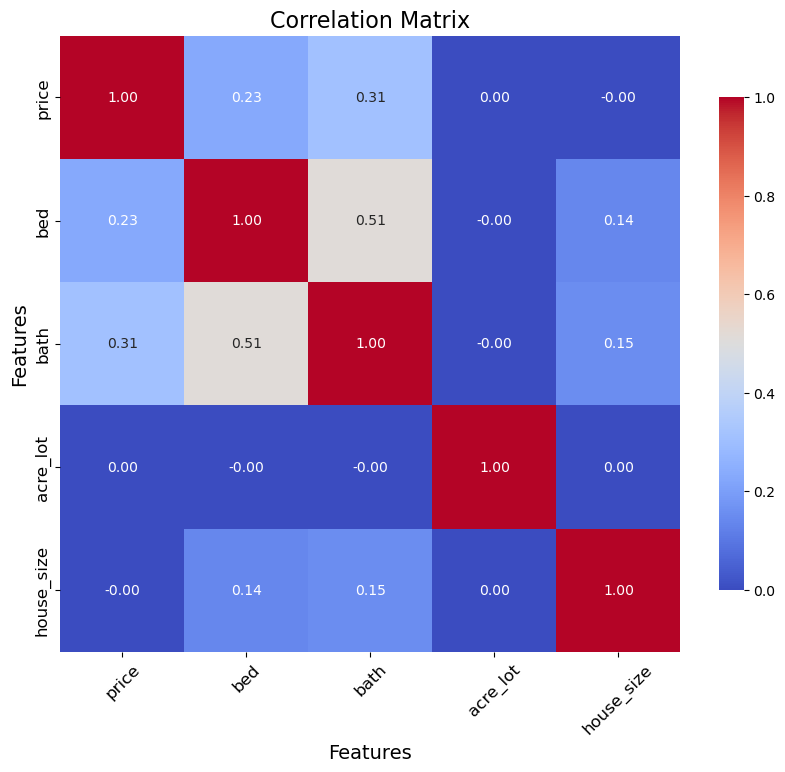

In [15]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_realtor_numeric.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar_kws={'shrink': 0.8}
)

# Add axis labels and title
plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Save the plot to a file
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

It does not look like there are any strong correlations here.  The strongest correlation is a positive relationship between number of bedrooms and number of bathrooms, which makes sense.  As the number of bedrooms goes up, so does the number of bathrooms.  Bedrooms and bathrooms both have a positive correlation to price, but not a strong one.  And Bed and Bath also have a weak positive correlation with house size.

# 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

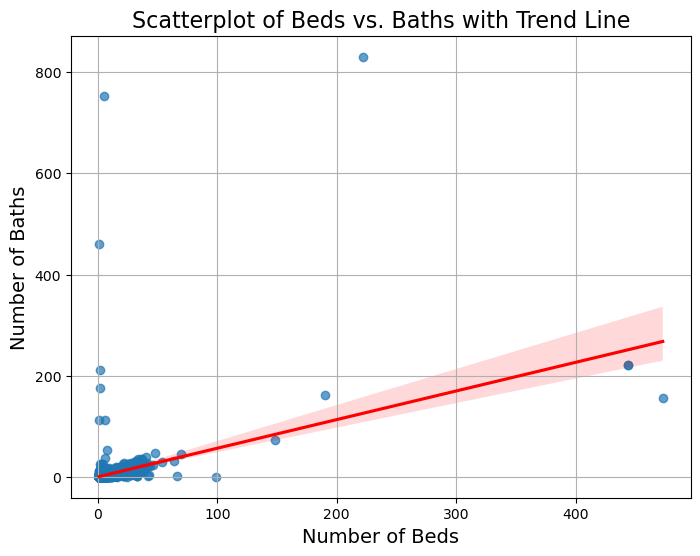

In [18]:
#Create scatterplot showing correlation between number of beds and number of bathrooms
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bed', y='bath', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatterplot of Beds vs. Baths with Trend Line', fontsize=16)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of Baths', fontsize=14)
plt.grid(True)
plt.show()

Wow.  It shows that some of the listings have more than 400 bedrooms and more than 800 bathrooms.  I'm wondering if some of these real estate listings were for whole apartment buildings or something like that.  If not, then its possible that there was some human error in some of these listings.  Other than the outliers, it looks like most of the data points follow a linear pattern, meaning there is a correlation; as the number of bedrooms goes up, so do the number of bathrooms, and vice versa.

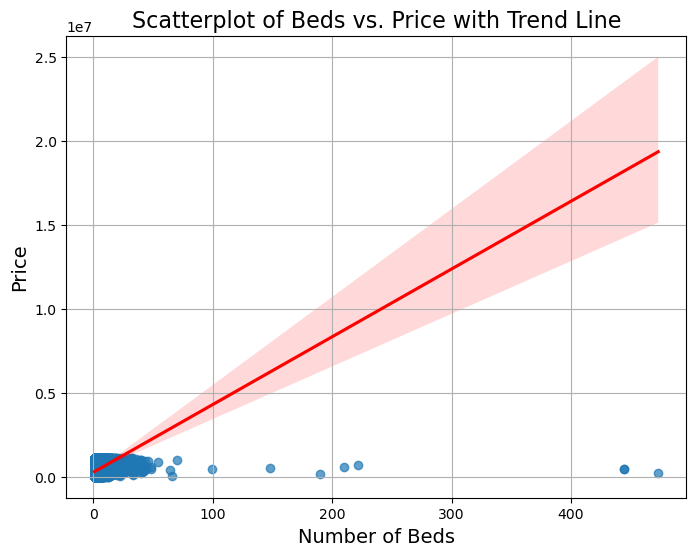

In [20]:
#Create scatterplot showing correlation between number of beds and price
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bed', y='price', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatterplot of Beds vs. Price with Trend Line', fontsize=16)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

Again, this one is hard to tell because of some of the outliers.

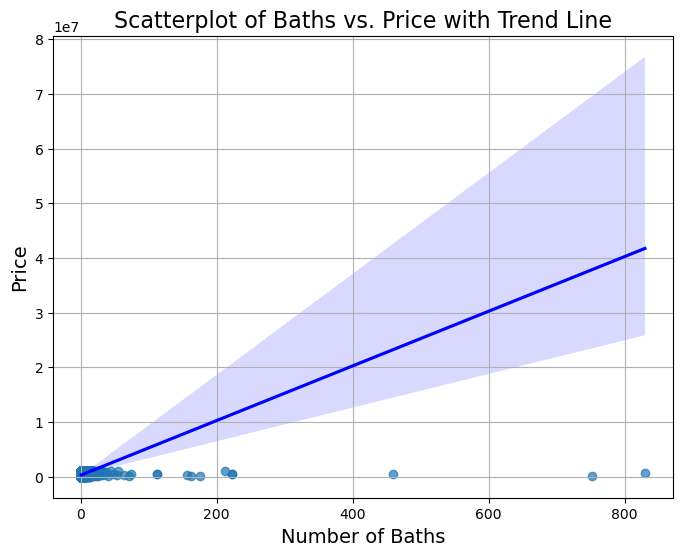

In [22]:
#Create scatterplot showing correlation between number of baths and price
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bath', y='price', scatter_kws={'alpha': 0.7}, line_kws={'color': 'blue'})
plt.title('Scatterplot of Baths vs. Price with Trend Line', fontsize=16)
plt.xlabel('Number of Baths', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

Again, it is almost impossible to tell anything from this because of the outliers.  For the purpose of this research project, I don't think we need to include any real estate listings with more than 20 bedrooms or 20 bathrooms.  At that point we would be talking about hotels and apartment buildings.  I am going to remove some of these outliers.

In [24]:
#Define thresholds for plausible values and remove outliers from the data frame
df_realtor = df_realtor[(df_realtor['bath'] <= 20) & (df_realtor['bed'] <= 20)]

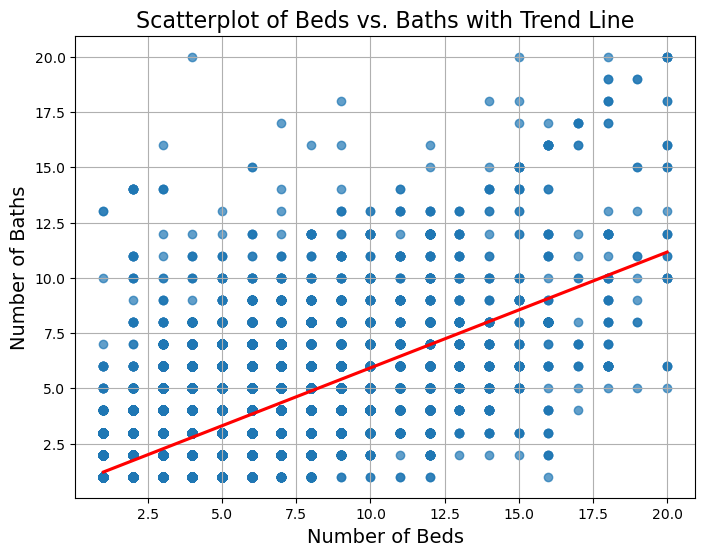

In [25]:
#Recreate scatterplot showing correlation between number of beds and number of bathrooms
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bed', y='bath', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatterplot of Beds vs. Baths with Trend Line', fontsize=16)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of Baths', fontsize=14)
plt.grid(True)
plt.show()

Much better because now we can visualize the data points more clearly.  However, looking at this scatterplot you can tell that it does not follow a linear pattern.

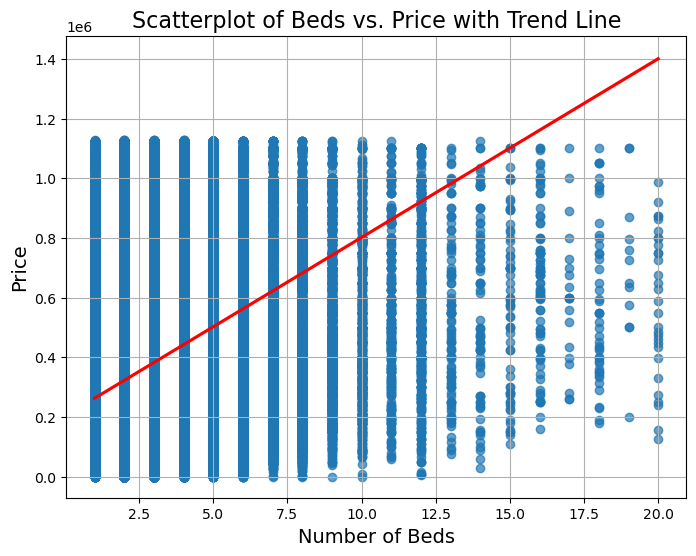

In [27]:
#Recreate scatterplot showing correlation between number of beds and price
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bed', y='price', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatterplot of Beds vs. Price with Trend Line', fontsize=16)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

Same thing; looks much better without the outliers, but still not following a linear pattern.

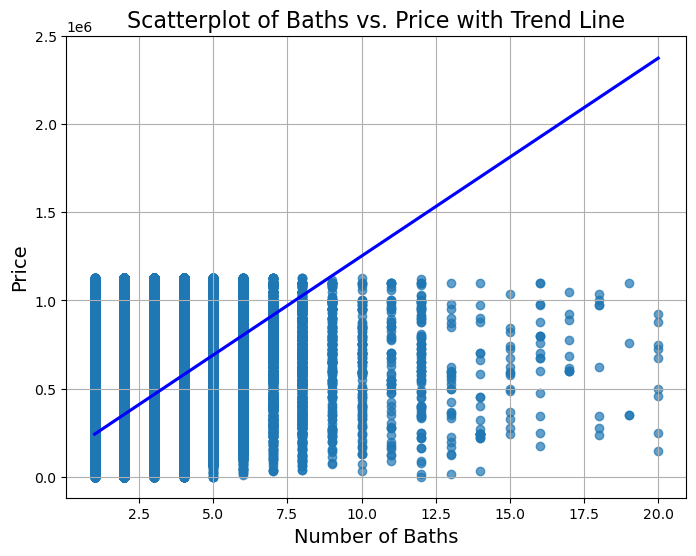

In [29]:
#Recreate scatterplot showing correlation between number of baths and price
plt.figure(figsize=(8, 6))
sns.regplot(data=df_realtor, x='bath', y='price', scatter_kws={'alpha': 0.7}, line_kws={'color': 'blue'})
plt.title('Scatterplot of Baths vs. Price with Trend Line', fontsize=16)
plt.xlabel('Number of Baths', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

Much better view of the data, but no linear pattern.

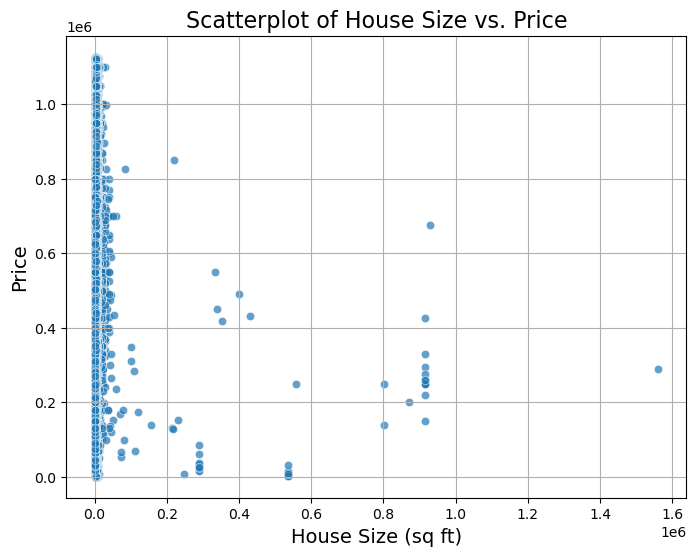

In [31]:
#Create scatterplot of house_size vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_realtor, x='house_size', y='price', alpha=0.7)
plt.title('Scatterplot of House Size vs. Price', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

# 5. Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

I tried running a pair plot for the entire data set, but it was too much.  I'm going to make a subset of the data for the pair plot.

In [34]:
#Create a subset the df_realtor DataFrame
columns_to_keep = ['status', 'price', 'bed', 'bath', 'acre_lot', 'house_size', 'price_range']
df_subset = df_realtor[columns_to_keep]

#Check the subset 
df_subset.head()

,status,price,bed,bath,acre_lot,house_size,price_range
3403,for_sale,180000.0,2.0,1.0,0.34,676.0,Low Range
3405,for_sale,169900.0,2.0,2.0,NaN,892.0,Low Range
3406,for_sale,242000.0,2.0,2.0,NaN,1428.0,Low Range
3407,for_sale,299950.0,2.0,2.0,NaN,1659.0,Low Range
3408,for_sale,239900.0,3.0,1.0,0.46,1196.0,Low Range


Still too big and it wouldn't process the pair plot.  I'm going to make a smaller subset removing the price_range and status as well.

In [36]:
#Check the subset's shape
df_subset.shape

(1552555, 7)

In [37]:
#Check the data types
df_realtor.dtypes

status              object
price              float64
bed                float64
bath               float64
acre_lot           float64
city                object
state               object
house_size         float64
prev_sold_date      object
price_range       category
dtype: object

I'm going to see try and switch the float64 data types to int32 to save memory and see if that works.

In [39]:
#Changing the 'bed' column's data type to int32
df_subset['bed'] = df_subset['bed'].astype('int32')

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_30295/343718308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['bed'] = df_subset['bed'].astype('int32')


In [40]:
#Changing the 'bath' column's data type to int32
df_subset['bath'] = df_subset['bath'].astype('int32')

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_30295/2471572876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['bath'] = df_subset['bath'].astype('int32')


In [41]:
#Changing the 'price' column's data type to int32
df_subset['price'] = df_subset['price'].astype('int32')

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_30295/2468179534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['price'] = df_subset['price'].astype('int32')


In [42]:
#Check to make sure it worked
df_subset.dtypes

status           object
price             int32
bed               int32
bath              int32
acre_lot        float64
house_size      float64
price_range    category
dtype: object

In [71]:
#Change the data types in the original data set
#Changing the 'bed' column's data type to int32
df_realtor['bed'] = df_realtor['bed'].astype('int32')

In [73]:
#Changing the 'bath' column's data type to int32
df_realtor['bath'] = df_realtor['bath'].astype('int32')

In [75]:
#Changing the 'price' column's data type to int32
df_realtor['price'] = df_realtor['price'].astype('int32')

In [77]:
#Create a smaller subset with less columns for the pair plot
columns_to_subset = ['price_range', 'bed', 'bath', 'house_size']
df_subset2 = df_realtor[columns_to_subset]

#Check subset
df_subset2.head()

,price_range,bed,bath,house_size
3403,Low Range,2,1,676.0
3405,Low Range,2,2,892.0
3406,Low Range,2,2,1428.0
3407,Low Range,2,2,1659.0
3408,Low Range,3,1,1196.0


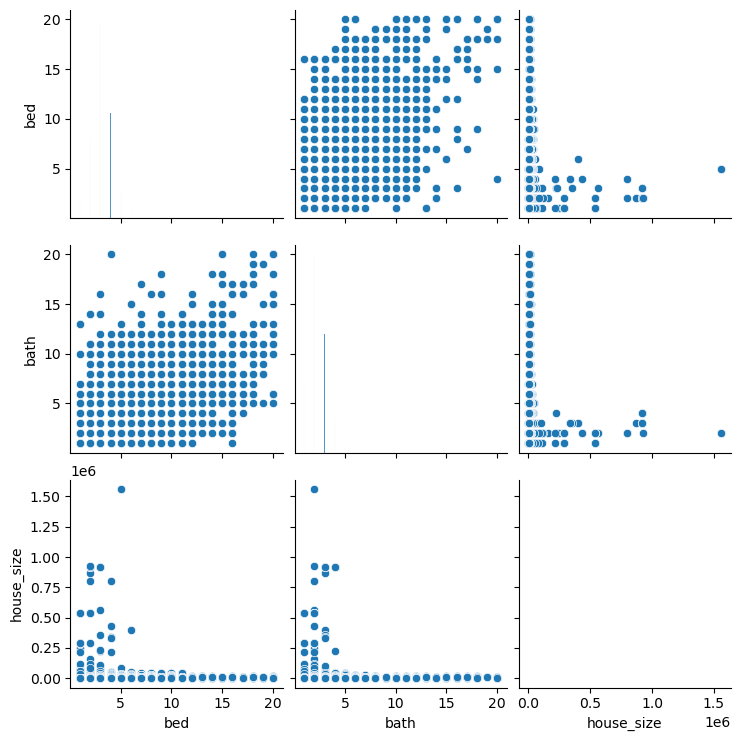

In [79]:
#Try the pair plot again with the df_subset2 and the data types changed
sns.pairplot(df_subset2)

#Display the plot
plt.show()

# 6. Create a categorical plot and interpret the results.

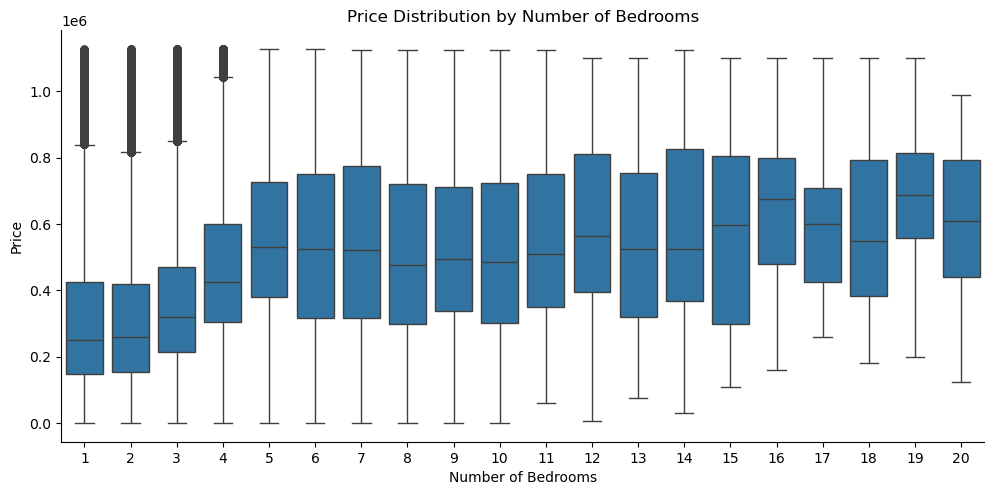

In [82]:
#Create a box plot for price by the number of bedrooms
sns.catplot(
    data=df_subset, 
    x="bed", 
    y="price", 
    kind="box",
    height=5, 
    aspect=2
)

plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

This box plot does a great job in visualizing the effect of number of bedrooms on the price.  It is not perfectly linear, but it is clear that as the number of bedrooms goes up, so does the price.

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Is there a correlation between how many bedrooms and the price of a house?

Yes, but not a strong one.

Is there a correlation between how many bathrooms and the price of a house?

Yes, but not a strong one.

Is there a correlation between square footage and the price of a house?

Yes, but not a strong one.

How does the average housing cost vary from state to state?

Have not explored yet.

Which states have higher rates of Low Range priced houses?

Have not explored yet.

Which states have higher rates of High Range priced houses?

Have not explored yet.


# 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

If real estate listings have less than two bedrooms and two bathrooms they will usually fall into the low-range price category. 

If listings have largeer house_size, then they will have higher prices.

If listings have more bedrooms and bathrooms, they will tend to have higher prices.


# Save the updated dataset with changes

In [92]:
#Export the cleaned dataframe
df_realtor.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/df_realtor_6.2')